In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

In [2]:
import ler
import gwsnr
print(f"ler version: {ler.__version__}")
print(f"gwsnr version: {gwsnr.__version__}")

ler version: 0.3.7
gwsnr version: 0.2.4


In [3]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51, 
          z_max=5,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

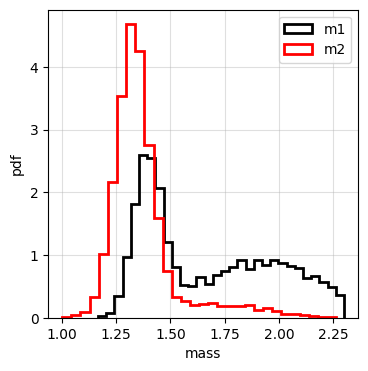

In [4]:
m1,m2 = ler.sample_source_frame_masses(size=10000)
plt.figure(figsize=(4,4))
plt.hist(m1, bins=30, histtype='step', lw=2, color='k', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', lw=2, color='r', label='m2', density=True)
plt.xlabel('mass')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Un-lensed events

In [17]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=100000,snr_threshold=8.0, output_jsonfile='n_unlensed_detectable_bns.json', meta_data_file='n_unlensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  300
collected number of detectable events =  300
total number of events =  72500000
total unlensed rate (yr^-1): 0.38732583499078327
collected number of detectable events =  301
total number of events =  72600000
total unlensed rate (yr^-1): 0.3880816360921197
collected number of detectable events =  302
total number of events =  72700000
total unlensed rate (yr^-1): 0.3888353579607152
collected number of detectable events =  303
total number of events =  72800000
total unlensed rate (yr^-1): 0.3895870091648366
collected number of detectable events =  305
total number of events =  72900000
total unlensed rate (yr^-1): 0.3916206001935846
collected number of detectable events =  305
total number of events =  73000000
total unlensed rate (yr^-1): 0.3910841336179769
collected number of detectable events =  305
total number of events =  73100000
total unlensed rate (yr^-1): 0.39054913480317804
collected number of detectable events =  307
total number

In [63]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta.json')
meta_data.keys()

dict_keys(['events_total', 'detectable_events', 'total_rate'])

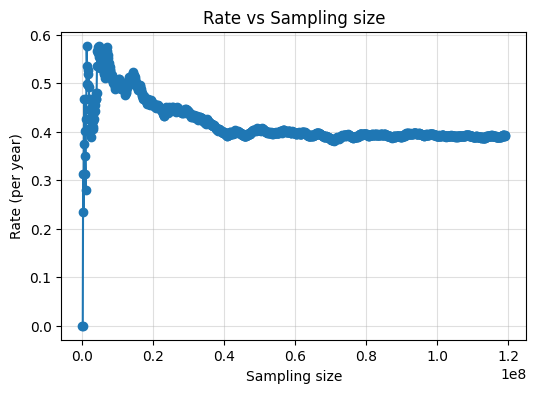

In [64]:
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [65]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.6e8)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 0.3922295568621635


## Lensed events

In [41]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=200000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns.json', meta_data_file='n_lensed_detectable_bns_meta.json', resume=True);

collected number of detectable events =  508.0


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.24it/s]


collected number of events =  508.0
total number of events =  141300000
total lensed rate (yr^-1): 0.0006968013467711057


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.30it/s]


collected number of events =  508.0
total number of events =  141500000
total lensed rate (yr^-1): 0.000695816468542454


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.30it/s]


collected number of events =  509.0
total number of events =  141700000
total lensed rate (yr^-1): 0.0006962021546861707


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.31it/s]


collected number of events =  509.0
total number of events =  141900000
total lensed rate (yr^-1): 0.0006952208972447525


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.87it/s]


collected number of events =  510.0
total number of events =  142100000
total lensed rate (yr^-1): 0.0006956063359556899


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]


collected number of events =  512.0
total number of events =  142300000
total lensed rate (yr^-1): 0.0006973527082210106


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  512.0
total number of events =  142500000
total lensed rate (yr^-1): 0.0006963739675778935


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.46s/it]


collected number of events =  512.0
total number of events =  142700000
total lensed rate (yr^-1): 0.0006953979704264178


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]


collected number of events =  513.0
total number of events =  142900000
total lensed rate (yr^-1): 0.0006957810034998108


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.25it/s]


collected number of events =  513.0
total number of events =  143100000
total lensed rate (yr^-1): 0.000694808563243347


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.57it/s]


collected number of events =  513.0
total number of events =  143300000
total lensed rate (yr^-1): 0.0006938388374049055


100%|███████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.10it/s]


collected number of events =  513.0
total number of events =  143500000
total lensed rate (yr^-1): 0.0006928718146350032


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.92it/s]


collected number of events =  514.0
total number of events =  143700000
total lensed rate (yr^-1): 0.0006932562311788177


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.74it/s]


collected number of events =  514.0
total number of events =  143900000
total lensed rate (yr^-1): 0.0006922927061876031


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.92it/s]


collected number of events =  514.0
total number of events =  144100000
total lensed rate (yr^-1): 0.0006913318557973359


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.51s/it]


collected number of events =  515.0
total number of events =  144300000
total lensed rate (yr^-1): 0.0006917168083206462


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.06s/it]


collected number of events =  517.0
total number of events =  144500000
total lensed rate (yr^-1): 0.0006934419756485504


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.28it/s]


collected number of events =  517.0
total number of events =  144700000
total lensed rate (yr^-1): 0.000692483520948276


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.19it/s]


collected number of events =  519.0
total number of events =  144900000
total lensed rate (yr^-1): 0.0006942028676450091


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.24it/s]


collected number of events =  520.0
total number of events =  145100000
total lensed rate (yr^-1): 0.0006945817404688834


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.14s/it]


collected number of events =  522.0
total number of events =  145300000
total lensed rate (yr^-1): 0.0006962934658126721


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.06s/it]


collected number of events =  522.0
total number of events =  145500000
total lensed rate (yr^-1): 0.000695336361392311


KeyboardInterrupt: 

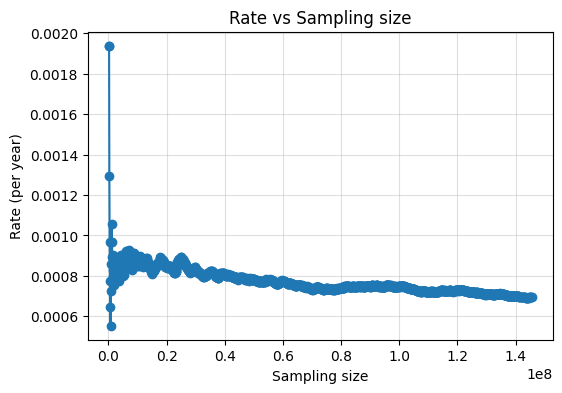

In [42]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [43]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.8e8)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.0007287450818946372


## rate comparison

In [70]:
0.0019/2.66

0.0007142857142857143

In [66]:
rate_unlensed/rate_lensed

538.2260088018988

## mass distribution (detectable)

* detector frame

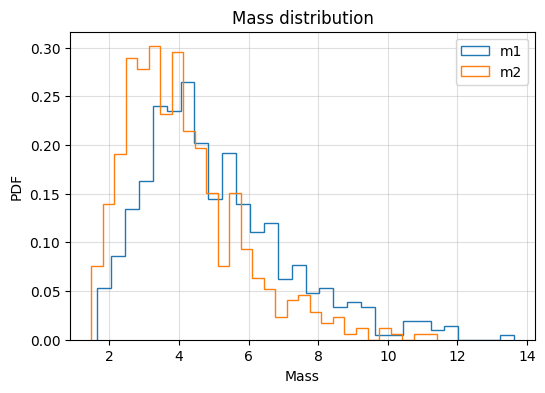

In [45]:
lensed_params = get_param_from_json('ler_data/n_lensed_detectable_bns.json')
m1 = lensed_params['mass_1']
m2 = lensed_params['mass_2']

# plot the mass distribution
plt.figure(figsize=(6,4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('Mass')
plt.ylabel('PDF')
plt.legend()
plt.title('Mass distribution')
plt.grid(alpha=0.4)
plt.show()

* source frame mass (not the inferred mass)

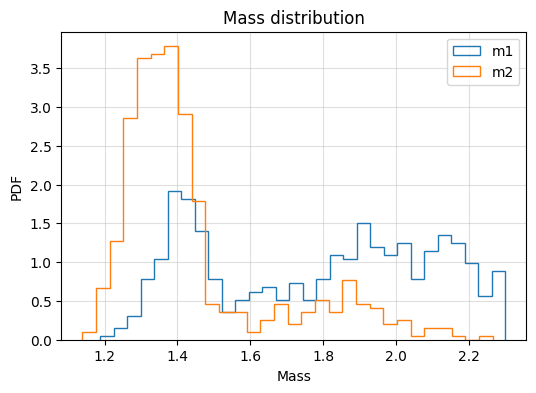

In [46]:
lensed_params = get_param_from_json('ler_data/n_lensed_detectable_bns.json')
m1 = lensed_params['mass_1_source']
m2 = lensed_params['mass_2_source']

# plot the mass distribution
plt.figure(figsize=(6,4))
plt.hist(m1, bins=30, histtype='step', label='m1', density=True)
plt.hist(m2, bins=30, histtype='step', label='m2', density=True)
plt.xlabel('Mass')
plt.ylabel('PDF')
plt.legend()
plt.title('Mass distribution')
plt.grid(alpha=0.4)
plt.show()

### Inferred mass

In [47]:
# for coversion, from luminosity distance to redshift
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
z = np.linspace(0, 10, 1000)
luminosity_distance = cosmo.luminosity_distance(z).value
from scipy.interpolate import interp1d
luminosity_distance_to_z = interp1d(luminosity_distance, z, kind='cubic', fill_value='extrapolate')

In [48]:
# detectable
lensed_params_detectable = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

# detector frame masses
m1_l_det = np.array(lensed_params_detectable['mass_1'])
m2_l_det = np.array(lensed_params_detectable['mass_2'])
# chirp mass
mc_l_det = m1_l_det
mc_l_det = np.array([mc_l_det, mc_l_det, mc_l_det, mc_l_det]).T
m1_l_det = np.array([m1_l_det, m1_l_det, m1_l_det, m1_l_det]).T
m2_l_det = np.array([m2_l_det, m2_l_det, m2_l_det, m2_l_det]).T

# redshifts
zs_l_det = np.array(lensed_params_detectable['zs'])
zs_l_det = np.array([zs_l_det, zs_l_det, zs_l_det, zs_l_det]).T

# observed
dl_l_eff_det = np.array(lensed_params_detectable['effective_luminosity_distance'])
zs_l_eff_det = luminosity_distance_to_z(dl_l_eff_det)
mc_l_eff_det = mc_l_det/(1+zs_l_eff_det)
m1_l_eff_det = m1_l_det/(1+zs_l_eff_det)
m2_l_eff_det = m2_l_det/(1+zs_l_eff_det)

In [49]:
# avoid nan
zs_l_eff_det = zs_l_eff_det.flatten()
mc_l_eff_det = mc_l_eff_det.flatten()
m1_l_eff_det = m1_l_eff_det.flatten()
m2_l_eff_det = m2_l_eff_det.flatten()
zs_l_det = zs_l_det.flatten()
idx_nan = np.isnan(zs_l_eff_det)
zs_l_eff_det = zs_l_eff_det[~idx_nan]
mc_l_eff_det = mc_l_eff_det[~idx_nan]
m1_l_eff_det = m1_l_eff_det[~idx_nan]
m2_l_eff_det = m2_l_eff_det[~idx_nan]
zs_l_det = zs_l_det[~idx_nan]

# choose only detectable
snr_l_det = np.array(lensed_params_detectable['optimal_snr_net']).flatten()
snr_l_det = snr_l_det[~idx_nan]
idx_detectable = snr_l_det > 8
zs_l_eff_det = zs_l_eff_det[idx_detectable]
mc_l_eff_det = mc_l_eff_det[idx_detectable]
m1_l_eff_det = m1_l_eff_det[idx_detectable]
m2_l_eff_det = m2_l_eff_det[idx_detectable]
zs_l_det = zs_l_det[idx_detectable]

In [50]:
np.min(m2_l_eff_det)

1.3919228097721958

In [51]:
# find the index of the min m2
idx = np.where(m2_l_eff_det == np.min(m2_l_eff_det))
print(f'm1 = {m1_l_eff_det[idx]}')
print(f'm2 = {m2_l_eff_det[idx]}')
print(f'z = {zs_l_det[idx]}')

m1 = [2.56427783]
m2 = [1.39192281]
z = [0.1882666]


In [71]:
lensed_params_detectable.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1'])

In [72]:
lensed_params_detectable['optimal_snr_net']-lensed_params_detectable['L1']

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0., nan, nan],
       ...,
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode


INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode


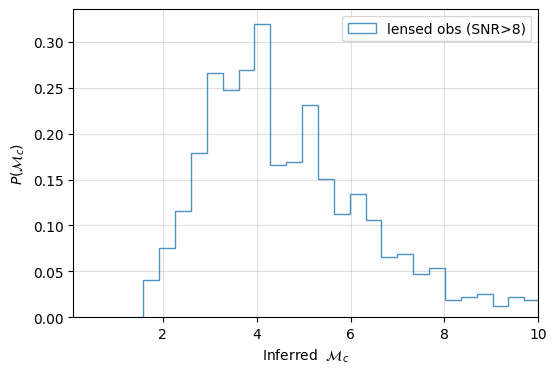

In [52]:
plt.figure(figsize=(6, 4))
plt.hist(mc_l_eff_det, bins=30, alpha=0.8, label='lensed obs (SNR>8)', density=True, histtype='step')
#plt.hist(mc_l_eff_det_sub, bins=20, alpha=0.8, label='lensed obs (SNR>6)', density=True, histtype='step')
plt.xlabel(r'Inferred  $\mathcal{M}_c$')
plt.ylabel(r'$P(\mathcal{M}_c)$')
plt.legend()
plt.grid(alpha=0.4)
plt.xlim(0.1, 10)
# plt.yscale('log')
# plt.xscale('log')
plt.show()

INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode
INFO:matplotlib.mathtext:Substituting symbol M from STIXNonUnicode


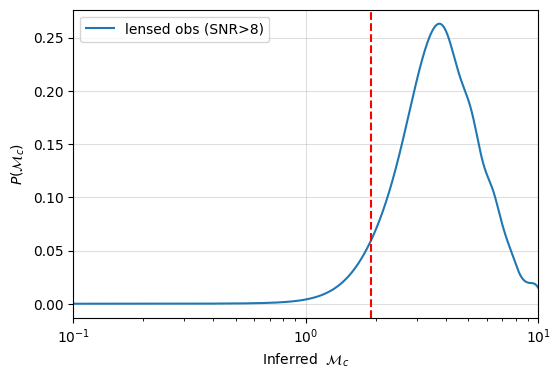

In [55]:
# find kde for mc_l_eff_det
from scipy.stats import gaussian_kde

kde_mc_l_eff_det = gaussian_kde(mc_l_eff_det)
mc_l_eff_det_grid = np.linspace(0.1, 10, 1000)
pdf_mc_l_eff_det = kde_mc_l_eff_det(mc_l_eff_det_grid)

plt.figure(figsize=(6, 4))
plt.plot(mc_l_eff_det_grid, pdf_mc_l_eff_det, label='lensed obs (SNR>8)')
plt.xlabel(r'Inferred  $\mathcal{M}_c$')
plt.ylabel(r'$P(\mathcal{M}_c)$')
plt.legend()
plt.grid(alpha=0.4)
plt.xlim(0.1, 10)
# plt.yscale('log')
plt.xscale('log')
# draw vertical line
plt.axvline(x=1.9, color='r', linestyle='--')
plt.show()


In [9]:
# calculate chirpmass with m1 and m2
m1 = 3.6
m2 = 1.4
(m1*m2)**(3/5)/(m1+m2)**(1/5)

1.9127769118804565

## effective redshift

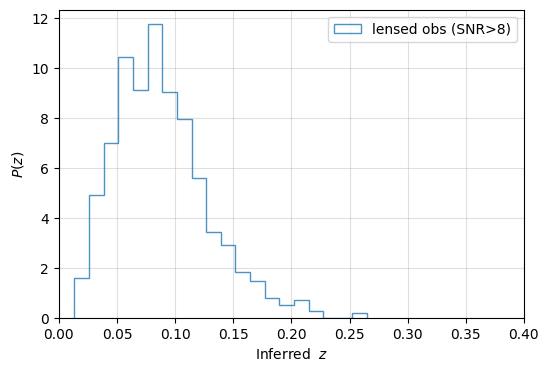

In [10]:
# plot zs_l_eff_det
plt.figure(figsize=(6, 4))
plt.hist(zs_l_eff_det, bins=20, alpha=0.8, label='lensed obs (SNR>8)', density=True, histtype='step')
plt.xlabel(r'Inferred  $z$')
plt.ylabel(r'$P(z)$')
plt.legend()
plt.grid(alpha=0.4)
plt.xlim(0, 0.4)
# plt.yscale('log')
# plt.xscale('log')
plt.show()

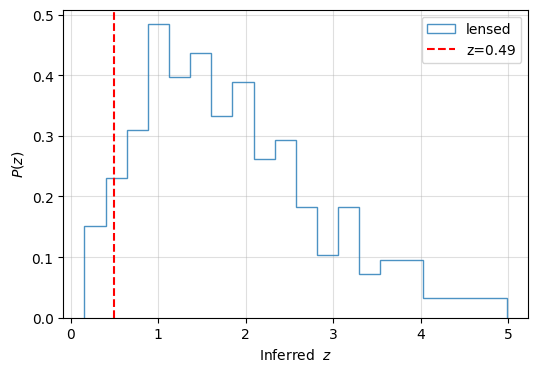

In [62]:
zs = lensed_params_detectable['zs']
# plot
plt.figure(figsize=(6, 4))
plt.hist(zs, bins=20, alpha=0.8, label='lensed', density=True, histtype='step')
plt.xlabel(r'Inferred  $z$')
plt.ylabel(r'$P(z)$')
# draw vertical line
plt.axvline(x=0.49, color='r', linestyle='--', label='z=0.49')
plt.grid(alpha=0.4)
plt.legend()

In [29]:
np.min(zs)

0.15617817875163684

## Magnification

In [31]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>8)[0]])

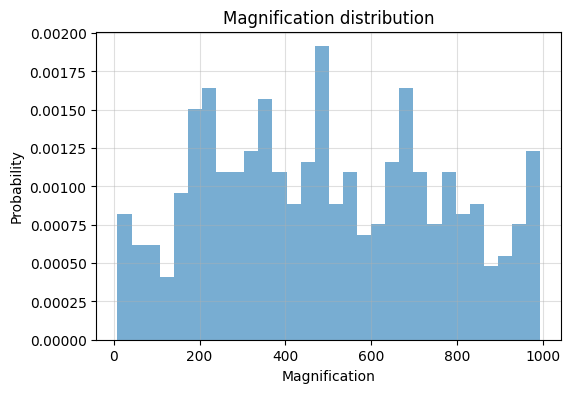

In [35]:
# plot histogram
plt.figure(figsize=(6,4))
mu_arr_ = mu_arr[mu_arr<1000]
plt.hist(mu_arr_, bins=30, alpha=0.6, density=True)
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.show()

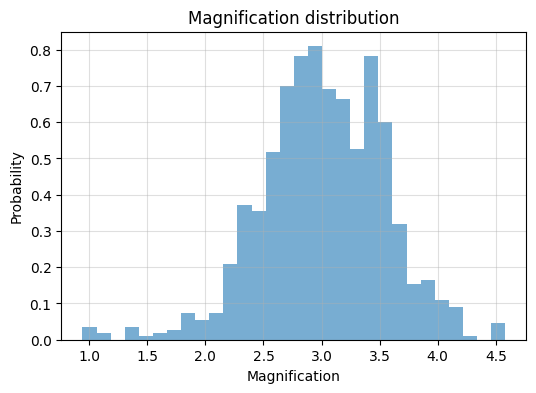

In [32]:
# plot histogram
plt.figure(figsize=(6,4))
plt.hist(np.log10(mu_arr), bins=30, alpha=0.6, density=True)
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.show()

## Changing mass model

In [8]:
ler = LeR(verbose=False,)

In [9]:
ler.available_gw_prior_list_and_its_params

{'merger_rate_density': {'merger_rate_density_bbh_popI_II_oguri2018': {'R0': 2.39e-08,
   'b2': 1.6,
   'b3': 2.0,
   'b4': 30},
  'star_formation_rate_madau_dickinson2014': {'af': 2.7, 'bf': 5.6, 'cf': 2.9},
  'merger_rate_density_bbh_popIII_ken2022': {'n0': 1.92e-08,
   'aIII': 0.66,
   'bIII': 0.3,
   'zIII': 11.6},
  'merger_rate_density_bbh_primordial_ken2022': {'n0': 4.4e-11,
   't0': 13.786885302009708}},
 'source_frame_masses': {'binary_masses_BBH_popI_II_powerlaw_gaussian': {'mminbh': 4.98,
   'mmaxbh': 112.5,
   'alpha': 3.78,
   'mu_g': 32.27,
   'sigma_g': 3.88,
   'lambda_peak': 0.03,
   'delta_m': 4.8,
   'beta': 0.81},
  'binary_masses_BBH_popIII_lognormal': {'Mc': 30.0,
   'sigma': 0.3,
   'beta': 1.1},
  'binary_masses_BBH_primordial_lognormal': {'Mc': 30.0,
   'sigma': 0.3,
   'beta': 1.1},
  'binary_masses_BNS_gwcosmo': {'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0},
  'binary_masses_BNS_bimodal': {'w': 0.643,
   'muL': 1.352,
   'sigmaL': 0.08,
   'muR': 1.88,
   's

In [59]:

# max possible detector frame mass mtot_max*(1+z_max)
ler = LeR(npool=6,
          verbose=False, 
          event_type='BNS',
          source_priors=dict(
              source_frame_masses='binary_masses_BNS_gwcosmo',
              ),
          source_priors_params=dict(
              source_frame_masses={'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0}
              ),
          mtot_max=30,
          z_max=4,
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",
          )

In [63]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=500, batch_size=100000,snr_threshold=8.0, num_img=1, output_jsonfile='n_lensed_detectable_bns_gwcosmo.json', meta_data_file='n_lensed_detectable_bns_meta_gwcosmo.json', resume=True);

collected number of detectable events =  47.0


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.05it/s]


collected number of events =  49.0
total number of events =  4800000
total lensed rate (yr^-1): 0.0015690377275031644


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it]


collected number of events =  49.0
total number of events =  4900000
total lensed rate (yr^-1): 0.0015370165493908548


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  50.0
total number of events =  5000000
total lensed rate (yr^-1): 0.0015370165493908548


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.43it/s]


collected number of events =  50.0
total number of events =  5100000
total lensed rate (yr^-1): 0.0015068789699910342


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.04it/s]


collected number of events =  50.0
total number of events =  5200000
total lensed rate (yr^-1): 0.0014779005282604374


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  51.0
total number of events =  5300000
total lensed rate (yr^-1): 0.0014790159248855397


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]


collected number of events =  53.0
total number of events =  5400000
total lensed rate (yr^-1): 0.0015085532799576909


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.69s/it]


collected number of events =  54.0
total number of events =  5500000
total lensed rate (yr^-1): 0.0015090707939473848


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.67s/it]


collected number of events =  55.0
total number of events =  5600000
total lensed rate (yr^-1): 0.00150956982529459


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  57.0
total number of events =  5700000
total lensed rate (yr^-1): 0.001537016549390855


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.88s/it]


collected number of events =  60.0
total number of events =  5800000
total lensed rate (yr^-1): 0.001590017120059505


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  60.0
total number of events =  5900000
total lensed rate (yr^-1): 0.0015630676773466321


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.10it/s]


collected number of events =  61.0
total number of events =  6000000
total lensed rate (yr^-1): 0.0015626334918807027


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.31s/it]


collected number of events =  63.0
total number of events =  6100000
total lensed rate (yr^-1): 0.001587410534616785


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.44it/s]


collected number of events =  63.0
total number of events =  6200000
total lensed rate (yr^-1): 0.0015618071388971593


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  64.0
total number of events =  6300000
total lensed rate (yr^-1): 0.001561413637476424


100%|█████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4075.24it/s]


collected number of events =  65.0
total number of events =  6400000
total lensed rate (yr^-1): 0.001561032432975087


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.93it/s]


collected number of events =  65.0
total number of events =  6500000
total lensed rate (yr^-1): 0.0015370165493908548


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.35it/s]


collected number of events =  67.0
total number of events =  6600000
total lensed rate (yr^-1): 0.00156030467892708


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.66s/it]


collected number of events =  69.0
total number of events =  6700000
total lensed rate (yr^-1): 0.0015828976404174476


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.09it/s]


collected number of events =  70.0
total number of events =  6800000
total lensed rate (yr^-1): 0.001582222918490586


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.37s/it]


collected number of events =  72.0
total number of events =  6900000
total lensed rate (yr^-1): 0.0016038433558861096


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]


collected number of events =  72.0
total number of events =  7000000
total lensed rate (yr^-1): 0.0015809313079448795


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.01s/it]


collected number of events =  73.0
total number of events =  7100000
total lensed rate (yr^-1): 0.0015803127902187662


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


collected number of events =  74.0
total number of events =  7200000
total lensed rate (yr^-1): 0.001579711453540601


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.32s/it]


collected number of events =  74.0
total number of events =  7300000
total lensed rate (yr^-1): 0.0015580715706153873


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.65it/s]


collected number of events =  75.0
total number of events =  7400000
total lensed rate (yr^-1): 0.0015577870433015422


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.38it/s]


collected number of events =  76.0
total number of events =  7500000
total lensed rate (yr^-1): 0.0015575101033827332


KeyboardInterrupt: 

In [64]:
# getting data from json
lensed_params_detectable = get_param_from_json("ler_data/n_lensed_detectable_bns_gwcosmo.json")

snr_l = lensed_params_detectable['optimal_snr_net'].flatten()
mu = lensed_params_detectable['magnifications'].flatten()
mu_arr = abs(mu[np.where(snr_l>8)[0]])

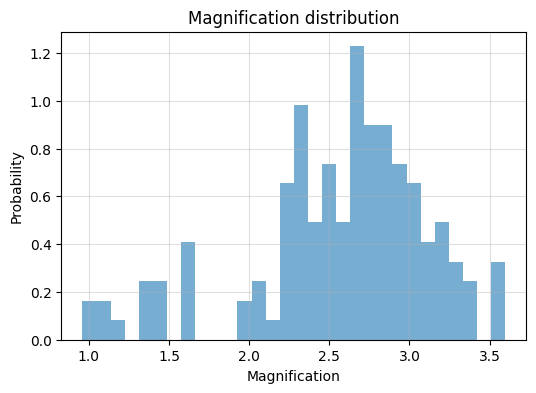

In [65]:
# plot histogram
plt.figure(figsize=(6,4))
plt.hist(np.log10(mu_arr), bins=30, alpha=0.6, density=True)
plt.xlabel('Magnification')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.grid(alpha=0.4)
plt.show()

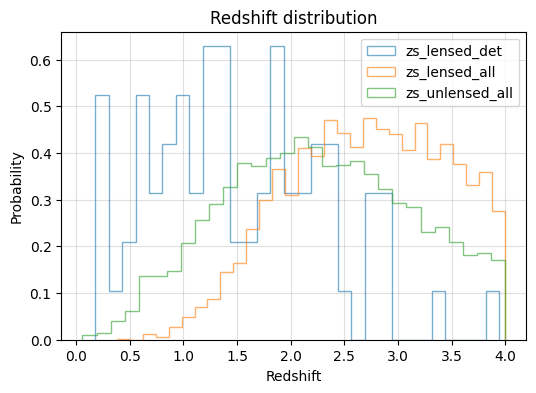

In [66]:
zs = lensed_params_detectable['zs']
zs_lensed = ler.sample_source_redshift_sl(size=5000)
zs_unlensed = ler.sample_source_redshift(size=5000)
# plot
plt.figure(figsize=(6,4))
plt.hist(zs, bins=30, alpha=0.6, density=True, histtype='step', label='zs_lensed_det')
plt.hist(zs_lensed, bins=30, alpha=0.6, density=True, histtype='step', label='zs_lensed_all')
plt.hist(zs_unlensed, bins=30, alpha=0.6, density=True, histtype='step', label='zs_unlensed_all')
plt.xlabel('Redshift')
plt.ylabel('Probability')
plt.title('Redshift distribution')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

### Checking possible magnification

* If the common BNS mass is 1.4, and it comes from z=3, what should be the magnification to be under the detector horizon?

In [47]:
# convert redshift to luminosity distance with astropy
from astropy.cosmology import Planck18
from astropy import units as u

zs=3
Planck18.luminosity_distance(zs).to(u.Mpc).value

26016.015955798568

In [36]:
from gwsnr import GWSNR

gwsnr = GWSNR(mtot_max=51, 
          psds={'L1':'custom_psd.txt'},
          snr_type="interpolation",)

npool:  4
snr type:  interpolation
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 51
detectors:  None
min(ratio):  0.1
max(ratio):  1.0
mtot resolution:  500
ratio resolution:  50
interpolator directory:  ./interpolator_pickle
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle


In [46]:
gwsnr.detector_horizon(mass_1=np.array([1.4,]), mass_2=np.array([1.4,]), snr_th=8.0, snr_th_net=8)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.12s/it]


{'L1': array([319.89599661]), 'net': array([319.89599661])}

In [52]:
# luminoisty distance to redshift
ler.Dl_to_z(np.array([320]))

array([0.07091793])

* Let $D_l^{eff}=320\text{Mpc}$

In [50]:
zs=3
Dl=Planck18.luminosity_distance(zs).to(u.Mpc).value
Dl_eff=320
mu = (Dl/Dl_eff)**2
print('mu =', mu)

mu = 6609.698107542633


In [53]:
# GW230529
gwsnr.detector_horizon(mass_1=np.array([3.6,]), mass_2=np.array([1.4,]), snr_th=8.0, snr_th_net=8)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.50s/it]


{'L1': array([454.0485148]), 'net': array([454.0485148])}

In [54]:
# luminoisty distance to redshift
ler.Dl_to_z(np.array([454.]))

array([0.09871636])

In [56]:
zs=2
Dl=Planck18.luminosity_distance(zs).to(u.Mpc).value
Dl_eff=454
mu = (Dl/Dl_eff)**2
print('mu =', mu)

mu = 1230.3354569423766
